# Física Estadística: _Tarea 2_

### Briones Andrade Joshua

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

### Ejercicio 1: Histogramas

Para cada una de las tres series de datos que se postearon en el blog del curso:

__a)__ Calcula los primeros cuatro momentos de las distribuciones.

In [40]:
dist = [];
for i in range(3):
    dist.append(pd.read_csv("Distribucion"+str(i+1)+".txt", header=None).to_numpy())
dist[0]

array([[ 0.20743293],
       [ 0.31529876],
       [-0.84292896],
       ...,
       [-0.6920295 ],
       [ 0.48633856],
       [-0.22326365]])

In [86]:
"""
Definimos dos funciones, con la primera calculamos los momentos y con la segunda calculamos 
parámetros como "skewness" y la "kurtosis""
"""

def momento(dist, n):
    m = dist - np.mean(dist)
    return np.sum(m**n/100000.0)

def momento_mod(dist, n):
    m = dist - np.mean(dist)
    s = np.sqrt(momento(dist,2))
    if n > 2: 
        t = np.sum(m**n/(100000.0*s**n))
    else:
        t = np.sum(m**n/100000.0)
    return t

In [87]:
for i in range(3):
    print(f"Distribución {i+1}:")
    for k in range(5):
          print(f"   Momento {k}: {momento(dist[i], k)}")
    print()

Distribución 1:
   Momento 0: 1.0
   Momento 1: 2.416415591927068e-17
   Momento 2: 0.3329636080340709
   Momento 3: 0.000677868468634469
   Momento 4: 0.19996847004342042

Distribución 2:
   Momento 0: 1.0
   Momento 1: 2.347297703431117e-16
   Momento 2: 3.975807504880251
   Momento 3: 0.010835119461595476
   Momento 4: 47.39797842149806

Distribución 3:
   Momento 0: 1.0
   Momento 1: -5.551115123125783e-17
   Momento 2: 96583.51398287427
   Momento 3: 5937360901.740389
   Momento 4: 553804973542506.44



In [90]:
names = ["Momento 0", "Momento 1", "Varianza", "Skewness", "Kurtosis"]

for i in range(3):
    print(f"Distribución {i+1}:")
    for k in range(5):
          print(f"   {names[k]}: {momento_mod(dist[i], k)}")
    print()

Distribución 1:
   Momento 0: 1.0
   Momento 1: 2.416415591927068e-17
   Varianza: 0.3329636080340709
   Skewness: 0.0035281763097291426
   Kurtosis: 1.803715286376101

Distribución 2:
   Momento 0: 1.0
   Momento 1: 2.347297703431117e-16
   Varianza: 3.975807504880251
   Skewness: 0.001366770763314398
   Kurtosis: 2.998534987050042

Distribución 3:
   Momento 0: 1.0
   Momento 1: -5.551115123125783e-17
   Varianza: 96583.51398287427
   Skewness: 197.80576503809388
   Kurtosis: 59367.785198949714



__b)__ Construye histogramas de cada distribución. (Pista: para la serie de datos #3, construye un
histograma con 200 bins, donde el primer bin del histograma comience en -500, y el tamaño de los bins sea igual a 5. Gráfica este histograma en escala semilogarítmica.)

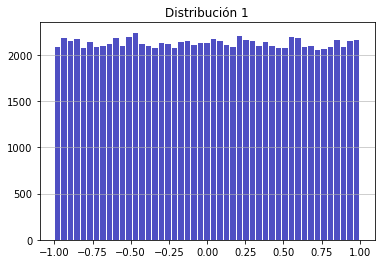

In [114]:
plt.hist(x=dist[0], bins="auto", color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75); plt.title('Distribución 1'); plt.plot();

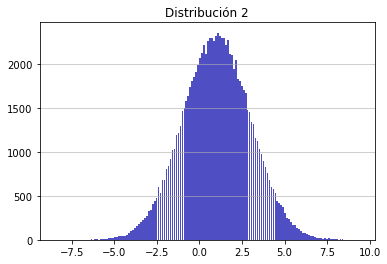

In [115]:
plt.hist(x=dist[1], bins="auto", color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75); plt.title('Distribución 2'); plt.plot();

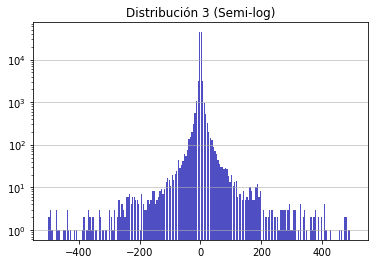

In [116]:
plt.hist(x=dist[2], bins=200, range=(-500,500), color='#0504aa',
                            alpha=0.7, rwidth=0.85, log=True)
plt.grid(axis='y', alpha=0.75); plt.title('Distribución 3 (Semi-log)'); plt.plot();

__c)__ ¿A qué distribución es probable que corresponda cada una de estas series de datos? Justifica
tu respuesta.

- Para la serie __#1__, le podemos asociar una __distribución uniforme__, ya que estan muy bien distribuidos en el intervalo $[-1,1]$ como se puede ver en la gráfica.

- Para la serie __#2__, se le asigna una __distribución normal__, ya que se puede ver que tiene un "skewness" de $0$ y una kurtosis muy cercana a $3$ por lo que puede ser considerada una distribución normal.

- Para la serie __#3__, se asocia una __distribución de Cauchy__, esto es porque los momentos normalizados "explotan" por lo que no están bien definidas justo como una distribución de cola pesada.

### Ejercicio 2: Distribuciones

Mostrar que:

__a)__ 
\begin{equation}
\langle x\rangle_{N(\mu,\sigma)}\equiv \int_{-\infty}^{\infty} xN(x,\mu,\sigma)dx=\mu
\end{equation}

____
\begin{equation*}
\langle x\rangle_{N(\mu,\sigma)}\equiv \int_{-\infty}^{\infty} xN(x,\mu,\sigma)dx=
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^{\infty} xe^{-\frac{(x-\mu)^2}{2\sigma^2}}dx
\end{equation*}

Hacemos un cambio de variable $z=\frac{x-\mu}{\sqrt{2}\sigma}$, entonces $dx=\sqrt{2}\sigma dz$ y continuamos con la integral

\begin{align*}
\int_{-\infty}^{\infty} xe^{-\frac{(x-\mu)^2}{2\sigma^2}}dx &= 
\sqrt{2}\sigma\int_{-\infty}^{\infty} \left(\sqrt{2}\sigma z+\mu\right)e^{-z^2}dz=
2\sigma^2\left(\int_{-\infty}^{\infty} ze^{-z^2}dz\right)+
\sqrt{2}\sigma\mu\left(\int_{-\infty}^{\infty} e^{-z^2}dz\right)=\dots\\
\dots &= 2\sigma^2\left(0\right)+\sqrt{2}\sigma\mu\left(\sqrt{\pi}\right)= \sqrt{2\pi\sigma^2}\mu
\end{align*}

Sustituimos este resultado en $\langle x\rangle_{N(\mu,\sigma)}$

\begin{equation*}
\langle x\rangle_{N(\mu,\sigma)}=
\frac{1}{\sqrt{2\pi\sigma^2}}\left(\int_{-\infty}^{\infty} xe^{-\frac{(x-\mu)^2}{2\sigma^2}}dx\right)=
\frac{1}{\sqrt{2\pi\sigma^2}}\left(\sqrt{2\pi\sigma^2}\mu\right)= \mu
\end{equation*}

Por lo tanto

\begin{equation*}
\boxed{\langle x\rangle_{N(\mu,\sigma)}=\mu}\quad\ \text{a)}
\end{equation*}

_____
__b)__ (Nota: Resuelve por partes)
\begin{equation}
\langle (x-\mu)^2\rangle_{N(\mu,\sigma)}\equiv \int_{-\infty}^{\infty} (x-\mu)^2N(x,\mu,\sigma)dx=\sigma^2
\end{equation}

_____

\begin{align*}
\langle (x-\mu)^2\rangle_{N(\mu,\sigma)} &\equiv 
\int_{-\infty}^{\infty} (x-\mu)^2N(x,\mu,\sigma)dx=
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^{\infty} (x-\mu)^2e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx
\end{align*}

Hacemos un cambio de variable $z=\frac{x-\mu}{\sqrt{2}\sigma}$, entonces $dx=\sqrt{2}\sigma dz$ y resolvemos la integral por separado.

\begin{align*}
\int_{-\infty}^{\infty} (x-\mu)^2e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx &=
\sqrt{2}\sigma\int_{-\infty}^{\infty} \left(\sqrt{2}\sigma z\right)^2e^{-z^2}dz =
\sqrt{2}\sigma\int_{-\infty}^{\infty} \left(2\sigma^2z^2\right)e^{-z^2}dz =
2^{3/2}\sigma^3\int_{-\infty}^{\infty} z^2e^{-z^2}dz 
\end{align*}

Y recordando el método de integración por partes, se tiene que 

\begin{equation*}
\int udv=uv-\int vdu
\end{equation*}

En este caso $u=z$ y $dv=ze^{-z^2}dz$, entonces $du=dz$ y $v=-\frac{e^{-z^2}}{2}$, por lo que

\begin{align*}
2^{3/2}\sigma^3\int_{-\infty}^{\infty} z^2e^{-z^2}dz = 
2^{3/2}\sigma^3\left[-\frac{ze^{-z^2}}{2}\bigg|_{-\infty}^{\infty}+
\frac{1}{2}\int_{-\infty}^{\infty} e^{-z^2}dz\right] =
2^{3/2}\sigma^3\left[-(0)+ \frac{1}{2}\left(\sqrt{\pi}\right)\right]=
\sqrt{2\pi}\sigma^3
\end{align*}

Sustituimos este resultado en $\langle (x-\mu)^2\rangle_{N(\mu,\sigma)}$

\begin{align*}
\langle (x-\mu)^2\rangle_{N(\mu,\sigma)} =
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^{\infty} (x-\mu)^2e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx=
\frac{1}{\sqrt{2\pi\sigma^2}}\left(\sqrt{2\pi}\sigma^3\right)= \sigma^2
\end{align*}

Por lo tanto

\begin{equation*}
\boxed{\langle (x-\mu)^2\rangle_{N(\mu,\sigma)}=\sigma^2}\quad\ \text{b)}
\end{equation*}

_____
__c)__
\begin{equation}
\langle x-\mu\rangle_{N(\mu,\sigma)}\equiv \int_{-\infty}^{\infty} (x-\mu)N(x,\mu,\sigma)dx=0
\end{equation}

_____
\begin{align*}
\langle x-\mu\rangle_{N(\mu,\sigma)} &\equiv 
\int_{-\infty}^{\infty} (x-\mu)N(x,\mu,\sigma)dx=
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^{\infty} (x-\mu)e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx
\end{align*}

Hacemos un cambio de variable $z=\frac{x-\mu}{\sqrt{2}\sigma}$, entonces $dx=\sqrt{2}\sigma dz$ y resolvemos la integral por separado.

\begin{align*}
\int_{-\infty}^{\infty} (x-\mu)e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx &=
\sqrt{2}\sigma\int_{-\infty}^{\infty} \left(\sqrt{2}\sigma z\right)e^{-z^2}dz =
2\sigma^2\int_{-\infty}^{\infty} ze^{-z^2}dz = 2\sigma^2\left(0\right)=0
\end{align*}

Esto es porque la función es impar por lo que al integral sobre todo el espacio se tiene $0$ de resultado, por lo tanto

\begin{equation*}
\boxed{\langle x-\mu\rangle_{N(\mu,\sigma)}=0}\quad\ \text{c)}
\end{equation*}

_____
__d)__
\begin{equation}
\langle x^2\rangle_{N(\mu,\sigma)}\equiv \int_{-\infty}^{\infty} x^2N(x,\mu,\sigma)dx=\mu^2+\sigma^2
\end{equation}

_____

\begin{align*}
\langle x^2\rangle_{N(\mu,\sigma)} \equiv 
\int_{-\infty}^{\infty} x^2N(x,\mu,\sigma)dx=
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^{\infty} x^2e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx
\end{align*}

Hacemos un cambio de variable $z=\frac{x-\mu}{\sqrt{2}\sigma}$, entonces $dx=\sqrt{2}\sigma dz$ y resolvemos la integral por separado.

\begin{align*}
\int_{-\infty}^{\infty} x^2e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx &=
\sqrt{2}\sigma\int_{-\infty}^{\infty} \left(\sqrt{2}\sigma z+\mu\right)^2e^{-z^2}dz = \dots \\
\dots &= \sqrt{2}\sigma\left[
2\sigma^2\int_{-\infty}^{\infty} z^2e^{-z^2}dz+
\sqrt{2}\sigma\mu\int_{-\infty}^{\infty} ze^{-z^2}dz+
\mu^2\int_{-\infty}^{\infty} e^{-z^2}dz\right]=\dots\\
\dots &= \sqrt{2}\sigma\left[
2\sigma^2\left(\frac{\sqrt{\pi}}{2}\right)+
\sqrt{2}\sigma\mu(0)+
\mu^2\left(\sqrt{\pi}\right)\right]=\dots\\
\dots &= \sqrt{2\pi}\sigma\left[\sigma^2+ \mu^2\right]
\end{align*}


Sustituimos este resultado en $\langle x^2\rangle_{N(\mu,\sigma)}$

\begin{align*}
\langle x^2\rangle_{N(\mu,\sigma)} =
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^{\infty} x^2e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx=\sigma^2+ \mu^2
\end{align*}

Por lo tanto

\begin{equation*}
\boxed{\langle x^2\rangle_{N(\mu,\sigma)}=\sigma^2+\mu^2}\quad\ \text{d)}
\end{equation*}

### Ejercicio 3: Función Generadora de Momentos

Encontrar la función generadora de momentos de las siguientes distribuciones de probabilidad. A partir de estas funciones que has encontrado calcula los dos primeros momentos de cada distribución.

__a)__ Normal: $N(m,a)$

Puesto que la función generadora de momentos esta definida como

\begin{equation}
    M_X(t)=\langle e^{tX}\rangle=\int_{-\infty}^{\infty}e^{tx}p(x)dx
\end{equation}

Entonces para la distribución normal tenemos

\begin{equation*}
    M_N(t)=\frac{1}{\sqrt{2\pi a^2}}\int_{-\infty}^{\infty} 
    e^{tx-\frac{(x-m)^2}{2a^2}}dx
\end{equation*}

Además si completamos el cuadrado

\begin{align*}
    tx-\frac{(x-m)^2}{2a^2} &=
    \frac{2a^2tx - (x^2-2m x+m^2)}{2a^2}=
    -\frac{x^2-2x(m-a^2 t)}{2a^2}-\frac{m^2}{2a^2}=
    -\frac{\left(x-m-a^2 t\right)^2}{2a^2}+
    \frac{(m-a^2t)^2-m^2}{2a^2}=\dots\\ 
    \dots &= -\frac{\left(x-m-a^2 t\right)^2}{2a^2}+
    \frac{(2mt-a^4t^2)}{2a^2}= -\frac{\left(x-m-a^2 t\right)^2}{2a^2}+
    mt+\frac{a^2t^2}{2}
\end{align*}

Entonces

\begin{equation*}
    M_N(t)=\frac{1}{\sqrt{2\pi a^2}}\int_{-\infty}^{\infty} 
    e^{tx-\frac{(x-m)^2}{2a^2}}dx=
    \frac{1}{\sqrt{2\pi a^2}}e^{mt+\frac{a^2t^2}{2}}\int_{-\infty}^{\infty} 
    e^{-\frac{\left(x-m-a^2 t\right)^2}{2a^2}}dx
\end{equation*}

Continuamos con el siguiente cambio de variable $z=x-m-a^2t$, entonces $dz=dx$

\begin{equation*}
    M_N(t)=
    \frac{1}{\sqrt{2\pi a^2}}e^{mt+\frac{a^2t^2}{2}}\int_{-\infty}^{\infty} 
    e^{-z^2/2a^2}dz= \frac{1}{\sqrt{2\pi a^2}}e^{mt+\frac{a^2t^2}{2}}\left(\sqrt{2\pi a^2}\right)=
    e^{mt+\frac{a^2t^2}{2}}
\end{equation*}

Y podemos reescribir los momentos con la función generadora

\begin{equation}
\left\langle X^n\right\rangle=\lim_{t\to 0}\left(\frac{d}{dt}\right)^n M_X(t)
\end{equation}


Por lo tanto

__a)__\begin{equation*}
\boxed{M_N(t)=e^{mt+\frac{a^2t^2}{2}}},\quad\ 
\left\langle X\right\rangle=\lim_{t\to0}e^{mt+\frac{a^2t^2}{2}}(m+a^2t)=m,\quad\ 
\left\langle X^2\right\rangle=\lim_{t\to0}\left[a^2+(m^2+a^2t)^2 \right]e^{mt+\frac{a^2t^2}{2}}=a^2+m^2
\end{equation*}


_______
__b)__ Uniforme: $U(m,a)$

Y para la distribución uniforme tenemos

\begin{equation*}
    M_U(t)=\frac{1}{2a}\int_{m-a}^{m+a} 
    e^{tx}dx= 
    \frac{e^{t(m+a)}-e^{t(m-a)}}{2at}
\end{equation*}

Calculamos los momentos, primero para $n=1$

\begin{equation*}
\left\langle X\right\rangle=\lim_{t\to0}\left[
\frac{(a+m) e^{t (a+m)}-(m-a)
   e^{t (m-a)}}{2 a
   t}-\frac{e^{t (a+m)}-e^{t
   (m-a)}}{2 a t^2}\right]
\end{equation*}

Y como en $t\to0$, este límite es de la forma $0/0$ por lo que usamos L'Hopital

\begin{align*}
L_1(t) &=\frac{\frac{d}{dt}[(a+m) e^{t (a+m)}-(m-a)
   e^{t (m-a)}]}{\frac{d}{dt}2 a
   t}-\frac{\frac{d^2}{dt^2}[e^{t (a+m)}-e^{t
   (m-a)}]}{\frac{d^2}{dt^2}2 a t^2}=\dots\\
\dots &=\frac{(a+m)^2 e^{t (a+m)}-(m-a)^2e^{t (m-a)}}{2 a}-
\frac{(a+m)^2 e^{t (a+m)}-(m-a)^2e^{t (m-a)}}{4 a}=\\
\dots &=\frac{(a+m)^2 e^{t (a+m)}-(m-a)^2e^{t (m-a)}}{4 a}
\end{align*}

Entonces 

\begin{align*}
L_1(0) =\frac{(a+m)^2-(m-a)^2}{2 a}=\frac{a^2+2am+m^2-(m^2-2am+a^2)}{4 a}=m
\end{align*}


Continuamos con $n=2$

\begin{equation*}
\left\langle X^2\right\rangle=\frac{1}{2a}\lim_{t\to0}\left[
\frac{2 \left(e^{t
   (a+m)}-e^{t
   (m-a)}\right)}{t^3}-\frac{2
   \left((a+m) e^{t
   (a+m)}-(m-a) e^{t
   (m-a)}\right)}{t^2}+\frac{(
   a+m)^2 e^{t (a+m)}-(m-a)^2
   e^{t (m-a)}}{t}\right]
\end{equation*}

Y como en $t\to0$, este límite es de la forma $0/0$ por lo que usamos L'Hopital

\begin{align*}
L_2(t) &= \frac{1}{2a}\left[
\frac{\frac{d^3}{dt^3}2 \left(e^{t(a+m)}-e^{t(m-a)}\right)}{\frac{d^3}{dt^3}[t^3]}-
\frac{\frac{d^2}{dt^2}2 \left((a+m) e^{t(a+m)}-(m-a) e^{t(m-a)}\right)]}{\frac{d^2}{dt^2}[t^2]}+
\frac{\frac{d}{dt}[(a+m)^2 e^{t (a+m)}-(m-a)^2e^{t (m-a)}]}{\frac{d}{dt}t}
\right]=\dots\\
\dots &=\frac{1}{2a}\left[
\frac{\left((a+m)^3e^{t(a+m)}-(m-a)^3e^{t(m-a)}\right)}{3}-
\left((a+m)^3 e^{t(a+m)}-(m-a)^3 e^{t(m-a)}\right)+
\left((a+m)^3 e^{t (a+m)}-(m-a)^3e^{t(m-a)}\right)
\right]=\dots\\
\dots &=\frac{1}{6a}\left[
(a+m)^3e^{t(a+m)}-(m-a)^3e^{t(m-a)}
\right]
\end{align*}

Entonces 

\begin{align*}
L_2(0) = \frac{1}{3a}(a^3+3am^2)=\frac{a^2}{3}+m^2
\end{align*}



Por lo tanto

__b)__\begin{equation*}
\boxed{M_U(t)=\frac{e^{t(m+a)}-e^{t(m-a)}}{2at}},\quad\ 
\left\langle X\right\rangle=m,\quad\ 
\left\langle X^2\right\rangle=\frac{a^2}{3}+m^2
\end{equation*}

### Ejercicio 4: Suma de Normales

Dadas $X_1=aN_1(0,1)$ y $X_2=bN_1(0,1)+cN_2(0,1)$, con $a$, $b$ y $c$ constantes, $N_1(0,1)$ y $N_2(0,1)$ variables normales unitarias independientes.

__a)__ Determinar $\text{COV}\{X_1,X_2\}$

Puesto que $\text{COV}\{X_1,X_2\}=\left\langle X_1X_2\right\rangle - \left\langle X_1\right\rangle\left\langle X_2\right\rangle$, entonces

\begin{align*}
\text{COV}\{X_1,X_2\} &=\left\langle X_1X_2\right\rangle - \left\langle X_1\right\rangle\left\langle X_2\right\rangle=
\left\langle X_1X_2\right\rangle - (a\cdot 0)(b\cdot0+c\cdot 0)=\left\langle X_1X_2\right\rangle = \left\langle abN_1(0,1)^2+acN_1(0,1)N_2(0,1)\right\rangle=\dots\\
\dots &= ab\left\langle N_1(0,1)^2\right\rangle+ac\left\langle N_1(0,1)N_2(0,1)\right\rangle=\dots\\
\dots &= ab+ac\left\langle N_1(0,1)\right\rangle\left\langle N_2(0,1)\right\rangle = ab+ac\cdot0=ab
\end{align*}

Por lo tanto
\begin{equation*}
\boxed{\text{COV}\{X_1,X_2\}=ab}\quad\ \text{a)}
\end{equation*}



_____
__b)__ Mostrar que $\text{VAR}\{X_1 +X_2\}\neq\text{VAR}\{X_1\}+\text{VAR}\{X_2\}$.

Primero con $X_1$: \begin{equation*}
X_1^2=a^2N_1(0,1)^2,\qquad\ \Rightarrow \left\langle X_1^2\right\rangle=a^2\left\langle N_1(0,1)^2\right\rangle=a^2
\end{equation*}

Ahora con $X_2$: 
\begin{align*}
X_2^2 &= b^2N_1(0,1)^2+2bcN_1(0,1)N_2(0,1)+c^2N_2(0,1)^2,\\
\Rightarrow \left\langle X_2^2\right\rangle &=
b^2\left\langle N_1(0,1)^2\right\rangle+2bc\left\langle N_1(0,1)N_2(0,1)\right\rangle+c^2 \left\langle N_2(0,1)^2\right\rangle=b^2+c^2
\end{align*}

Y como $\langle X_i\rangle=0$ para $i=1,2$, tenemos que 

\begin{equation*}
\text{VAR}\{X_1\}+\text{VAR}\{X_2\}=a^2+b^2+c^2
\end{equation*}

\begin{align*}
(X_1+X_2)^2 &=X_1^2+2X_1X_2+X_2^2 \\
\Rightarrow \left\langle(X_1+X_2)^2\right\rangle &= \left\langle X_1^2+2X_1X_2+X_2^2\right\rangle = 
\left\langle X_1^2\right\rangle+2\left\langle X_1X_2\right\rangle+\left\langle X_2^2\right\rangle = \dots\\
\dots &= a^2+2\left\langle abN_1(0,1)^2+acN_1(0,1)N_2(0,1)\right\rangle+(b^2+c^2) = \dots\\
\dots &= a^2+b^2+c^2+2\left[
ab\left\langle N_1(0,1)^2\right\rangle+
ac\left\langle N_1(0,1)N_2(0,1)\right\rangle\right] = \dots\\
\dots &= a^2+b^2+c^2+2ab
\end{align*}

Y como $\langle X_1+X_2\rangle=0$, tenemos que 

\begin{equation*}
\text{VAR}\{X_1+X_2\}=a^2+b^2+c^2+2ab
\end{equation*}

Por lo tanto 

\begin{equation*}
\boxed{\text{VAR}\{X_1+X_2\} \neq \text{VAR}\{X_1\} + \text{VAR}\{X_2\}}\quad\ \text{b)}
\end{equation*}